<a href="https://colab.research.google.com/github/Falconwatch/SberUni-ChooseMLModel/blob/main/HW_1/HW_1_Optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 1

# Автор: Алина Ермилова

В этой домашней работе Вы сможете попрактиваться в применении фреймворка для подбора гиперпараметров [Optuna](https://optuna.org/) для одной из наиболее популярных вариаций градиентного бустинга [XGBoost](https://xgboost.readthedocs.io/en/stable/python/index.html).

Это домашнее задание состоит из **4х заданий**, **максимальная** сумма за выполнение которых составляет **25 баллов**. Однако, **3 лучших решения** получат дополнительно **+5 бонусных баллов**.

In [1]:
# установка необходимых библиотек
!pip install -q optuna optuna-dashboard xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.3 MB/s eta 0:00:00


# Задание 1. [5 баллов]

Возьмите выборку на Ваше усмотрение и сделайте ее быстрый анализ, постройте первый вариант модели.

Примеры анализа и построения модели:
* [Предсказание стоимости автомобилей](https://www.kaggle.com/code/niteshyadav3103/car-price-eda-and-modelling). Пример jupyter-ноутбука с детальным анализом данных, разбиением выборки на обучающую и тестовую и построением нескольких классических моделей.
* [Апельсины и грейпфруты](https://www.kaggle.com/code/mahmoudmagdy07/oranges-vs-grapefruit-team-20). Пример jupyter-ноутбука с детальным анализом данных, разбиением выборки на обучающую и тестовую и использованием "Наивного Байеса" и нейросетей.


In [3]:
!wget -q https://raw.githubusercontent.com/Falconwatch/SberUni-ChooseMLModel/main/HW_1/citrus.csv

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("citrus.csv")
data = pd.DataFrame(data)
data

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [6]:
data.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


<ipython-input-8-49c28251f74c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr(method = 'pearson')


<Axes: >

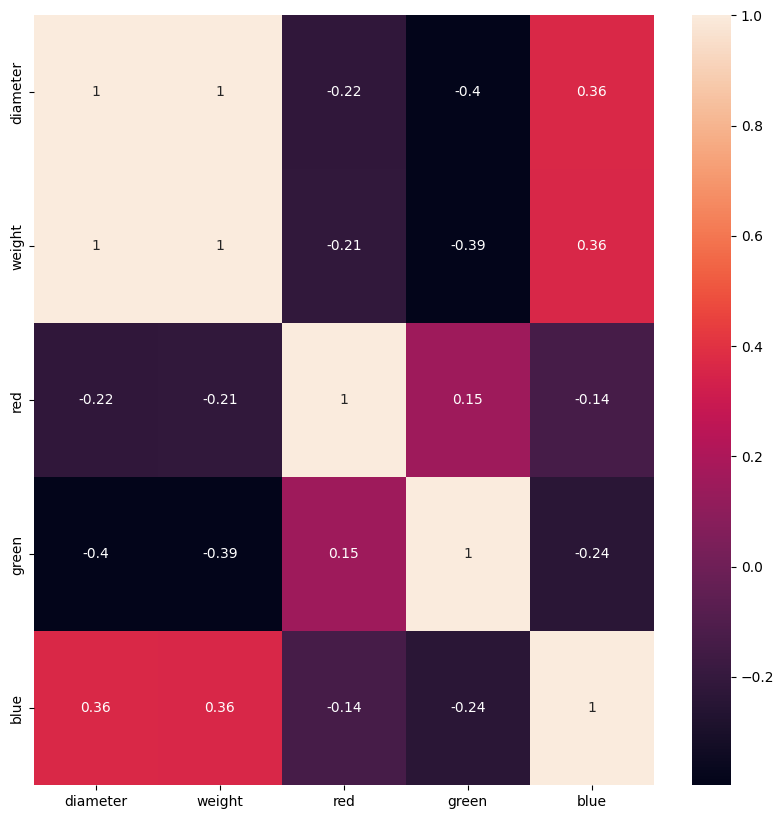

In [8]:
# correlation between features using pearson's correlation coefficient
cor = data.corr(method = 'pearson')
plt.figure(figsize = (10,10))
sns.heatmap(cor, annot=True)

In [39]:
def plot_scatter(ax, df, col, splitter="name"):
  unique_names = df[splitter].unique()
  for un in unique_names:
    un_data = df.loc[df[splitter]==un]
    ax.scatter(un_data.index, un_data[col], label=un)
  ax.legend(loc="upper right")
  #ax.title(col)
  ax.set_title(col)


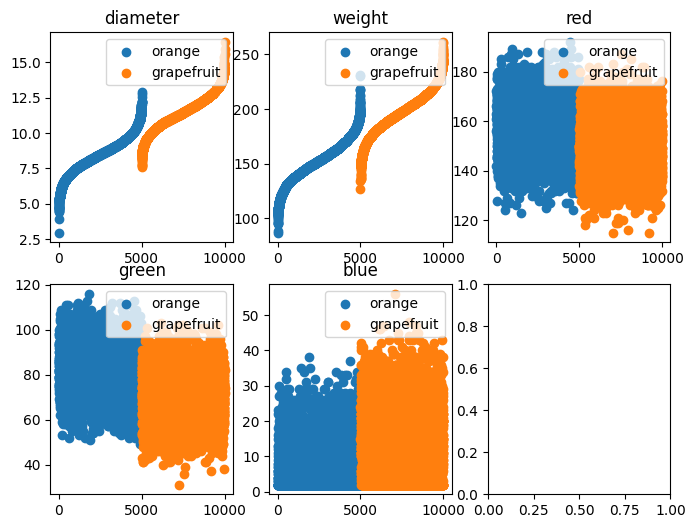

In [40]:
fig, axs = plt.subplots(2, 3, figsize=(8, 6))
for i,c in enumerate(data.columns[1:]):
  m = i%3
  n = i//3
  plot_scatter(axs[n, m], data, c)

# 2. Задание 2 [5 баллов]
Разбейте выборку на обучение и контроль. Вам может понадобится [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

# Задание 3. [10 баллов]

Проведите для данной выборки подбор гиперпараметров для модели `XGBoost` с помощью `Optuna`. Варьируйте **не менее 5** гиперпараметров.


# Задание 4. [5 баллов]

Проанализируйте результаты -- на сколько улучшилось качество модели с учетом Вашего разбиения.